# **word2vec**
- Word2Vecは、当時Googleに在籍していた研究者であるトマス・ミコロフ氏らが考案。
- 2層のニューラルネットワークのみで構成されるシンプルな構造により、大規模データによる分散表現学習が現実的な計算量で可能となり、分散表現での自然言語処理が飛躍的に進む等、自然言語処理に大きな技術的進展をもたらしたツール。
---
- 以下は、**学習済モデル**→ [**20170201.tar.bz2（解凍後のファイル名はentity_vector.model.bin）**](http://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/data/20170201.tar.bz2) を利用し、類似語抽出、単語の加減算や複数単語の類似度、類似語の分布をグラフ表示させることができる。
- 学習モデルをダウンロードし、GoogleDriveに保存（初回のみ）、実行すると（最初のセルで）URLへのアクセスが要求されるのでアクセスしログイン。表示されるauthorization codeをコピーし、セルに表示される [ Enter your authorization code: ] の入力枠にコピペ⏎するだけです。
- 学習済モデルの保存フォルダの初期設定は「/content/drive/My Drive/NLP」です。変更の場合は任意に設定してください。
- 類似語、加算、減算、加減算等、文字を書き換え、セルを実行してください。


# **学習済モデル & ライブラリインポート**
**<font color= "LightCoral">※GoogleDriveログイン要求あり</font>**

In [1]:
#GoogleDriveへのアクセス
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
#学習済モデル保存フォルダ指定
%cd /content/drive/My Drive/NLP

/content/drive/My Drive/NLP


In [57]:
#ライブラリのインポート
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('entity_vector.model.bin', binary=True)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# **Simulation**
- **類似語**、**加算**、**減算**、**加減算**、**類似度計算**を行う。
- 類似度＝**cos類似度**。2つのベクトルがどれだけ同じ方向を向いているか(類似しているか)を数値化したもの。cos類似度が0のときは類似度が低く、1のときには類似度が高い。

## **類似語**

In [4]:
model.most_similar(positive=[u'[自然言語処理]'])

[('[機械学習]', 0.8565625548362732),
 ('[バイオインフォマティクス]', 0.8253364562988281),
 ('[パターン認識]', 0.8229110836982727),
 ('[信号処理]', 0.8176584243774414),
 ('[音声認識]', 0.8170164823532104),
 ('[ソフトウェア工学]', 0.812477707862854),
 ('[エキスパートシステム]', 0.8097817897796631),
 ('[画像処理]', 0.804164469242096),
 ('[データマイニング]', 0.8024126291275024),
 ('[プログラミング_(コンピュータ)]', 0.7996261119842529)]

In [5]:
model.most_similar(u'[機械学習]')

[('[自然言語処理]', 0.8565625548362732),
 ('[ニューラルネットワーク]', 0.8451800346374512),
 ('[ソフトウェア工学]', 0.8403654098510742),
 ('[数値解析]', 0.8343542218208313),
 ('[情報検索]', 0.8264193534851074),
 ('[暗号理論]', 0.8261511325836182),
 ('[信号処理]', 0.8223314881324768),
 ('[バイオインフォマティクス]', 0.8196768164634705),
 ('[パターン認識]', 0.8176349997520447),
 ('[情報理論]', 0.8039703965187073)]

In [6]:
model.most_similar(positive=u'[指原莉乃]')

[('[前田敦子]', 0.8524860143661499),
 ('[松井玲奈]', 0.8497596979141235),
 ('[柏木由紀]', 0.8481603860855103),
 ('[大島優子]', 0.8426693677902222),
 ('[渡辺麻友]', 0.836478590965271),
 ('[高橋みなみ]', 0.8302541971206665),
 ('[山本彩]', 0.8275360465049744),
 ('[HKT48]', 0.8238900899887085),
 ('[小嶋陽菜]', 0.8218119144439697),
 ('[島崎遥香]', 0.8172259330749512)]

In [7]:
model.most_similar(positive=[u'ハマグリ'])

[('[サザエ]', 0.7147798538208008),
 ('カキ', 0.7067751288414001),
 ('イワシ', 0.6987277269363403),
 ('ウナギ', 0.6950771808624268),
 ('[イカナゴ]', 0.6804199814796448),
 ('[ハマグリ]', 0.6799237728118896),
 ('海藻', 0.6793920397758484),
 ('ホタテ', 0.675447940826416),
 ('[芋]', 0.6729985475540161),
 ('サツマイモ', 0.6713895797729492)]

## **加算**

In [8]:
model.most_similar(positive=[u'[公務員]',u'[ピストル]'])

[('[警察官]', 0.7124895453453064),
 ('[日本の警察官]', 0.7051844596862793),
 ('[警棒]', 0.693226158618927),
 ('[拳銃]', 0.6676813364028931),
 ('[刑務官]', 0.6608917713165283),
 ('警察官', 0.6491464972496033),
 ('[自衛隊員]', 0.6456711888313293),
 ('[警察]', 0.628797173500061),
 ('拳銃', 0.6269474029541016),
 ('[催涙スプレー]', 0.6268929243087769)]

In [9]:
model.most_similar(positive=[u'[漫才]',u'[コント]'])

[('漫才', 0.8638547658920288),
 ('コント', 0.8475837111473083),
 ('ネタ', 0.7827564477920532),
 ('[漫談]', 0.7583362460136414),
 ('[物真似]', 0.7573819756507874),
 ('[ツービート]', 0.7570918798446655),
 ('お笑い', 0.7559741139411926),
 ('芸人', 0.7527778148651123),
 ('[落語]', 0.7474441528320312),
 ('持ちネタ', 0.745084285736084)]

In [10]:
model.most_similar(positive=[u'[松本人志]',u'[浜田雅功]'])

[('[明石家さんま]', 0.8944313526153564),
 ('[内村光良]', 0.8791624307632446),
 ('[小堺一機]', 0.8696273565292358),
 ('[ダウンタウン_(お笑いコンビ)]', 0.865553081035614),
 ('[今田耕司]', 0.8613864183425903),
 ('[石橋貴明]', 0.8613485097885132),
 ('[島田紳助]', 0.8596440553665161),
 ('[関根勤]', 0.8581082820892334),
 ('[ケンドーコバヤシ]', 0.8572862148284912),
 ('[ビートたけし]', 0.8572009205818176)]

In [11]:
model.most_similar(positive=[u'[ドア]',u'[生物]'])

[('[動物]', 0.6655120849609375),
 ('[脊椎動物]', 0.651593804359436),
 ('[器官]', 0.6405065059661865),
 ('[哺乳類]', 0.6291496753692627),
 ('[昆虫]', 0.6220320463180542),
 ('器官', 0.6159601211547852),
 ('物体', 0.6143906116485596),
 ('[扉]', 0.6139690279960632),
 ('生物', 0.6118402481079102),
 ('[殻]', 0.6095578670501709)]

## **減算**

In [12]:
model.most_similar(positive=[u'友人'], negative=[u'友情'])

[('知人', 0.49574047327041626),
 ('自宅', 0.40951821208000183),
 ('たまたま', 0.403830349445343),
 ('知り合い', 0.3998960852622986),
 ('学友', 0.3915533721446991),
 ('秘書', 0.3807677626609802),
 ('[長谷川真太郎]', 0.3792070150375366),
 ('同僚', 0.37444400787353516),
 ('宅', 0.3721948564052582),
 ('行きつけ', 0.3707841634750366)]

In [13]:
model.most_similar(positive=[u'[悪魔]'], negative=[u'[悪]'])

[('[ミッキーマウス]', 0.499137282371521),
 ('ディズニーキャラクター', 0.48958778381347656),
 ('[ディズニーキャラクター]', 0.4716237783432007),
 ('[ミニーマウス]', 0.42842087149620056),
 ('パペット', 0.4260064661502838),
 ('[妖精]', 0.4153488278388977),
 ('[ゴエティア]', 0.4150884747505188),
 ('[海賊_(ONE_PIECE)]', 0.4051780104637146),
 ('[アラジン_(映画)]', 0.40373989939689636),
 ('[道化師]', 0.39855796098709106)]

In [15]:
model.most_similar(positive=[u'[電車]'], negative=[u'[電気]'])

[('[JR東日本キハ100系気動車]', 0.507335901260376),
 ('2000形', 0.49931007623672485),
 ('[国鉄50系客車]', 0.4972899556159973),
 ('電車', 0.4945000112056732),
 ('[気動車]', 0.49280470609664917),
 ('[国鉄14系客車]', 0.49085062742233276),
 ('気動車', 0.490439236164093),
 ('客車', 0.4902816414833069),
 ('[客車]', 0.4892442226409912),
 ('[JR西日本キハ120形気動車]', 0.4891449213027954)]

## **加減算**

In [14]:
model.most_similar(positive=[u'[王様]',u'[女]'], negative=[u'[男]'])

[('[篠原ともえ]', 0.6583760976791382),
 ('[西川貴教]', 0.6556880474090576),
 ('[BUMP_OF_CHICKEN]', 0.6552205681800842),
 ('[PUFFY]', 0.6472346782684326),
 ('[ふかわりょう]', 0.6455428600311279),
 ('[桃井はるこ]', 0.6389861106872559),
 ('[天地真理]', 0.6388994455337524),
 ('[きゃりーぱみゅぱみゅ]', 0.6282798051834106),
 ('ものまね', 0.6282633543014526),
 ('[美川憲一]', 0.626285970211029)]

In [16]:
model.most_similar(positive=[u'[イチロー]',u'[サッカー]'], negative=[u'[野球]'])

[('[ロナウド]', 0.6781752109527588),
 ('[ジネディーヌ・ジダン]', 0.6686528325080872),
 ('[中田英寿]', 0.6643422842025757),
 ('[ジーコ]', 0.6631736755371094),
 ('[ロベルト・バッジョ]', 0.6589246988296509),
 ('[ロナウジーニョ]', 0.6574504971504211),
 ('[ディエゴ・マラドーナ]', 0.6535028219223022),
 ('ジダン', 0.6474759578704834),
 ('[デビッド・ベッカム]', 0.6473382115364075),
 ('[三浦知良]', 0.6451823711395264)]

## **類似度**

In [59]:
print(model.similarity('猫', '犬'))
print(model.similarity('猫', '人'))

0.74398094
0.29112488


# **複数単語の類似度分布**

### **日本語化**

In [18]:
#matplotlib日本語化
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 12.4 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=042dd2d4257cfa11d565ccded6991efbdbfa30eed1d3c741d7e2b7e63443149c
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


### **類似度分布が確認したい複数単語設定**

In [37]:
tags = [u'[Python]', u'[機械学習]', u'[自然言語]', u'[AI]']

### **モデル構築**

In [38]:
import numpy as np

# 単語の類似語とベクトルを返す
def similars(words, model):
    vectors = []
    cluster = []
    label = []
    for i in range(len(tags)):
        tag = tags[i]
        similar = model.similar_by_word(tag, topn=10)
        for x in similar:
            cluster.append(i)
            label.append(tag)
            vectors.append(model[x[0]])
    return vectors, cluster, label

vectors, cluster, label = similars(tags, model)

# ベクトルの次元を確認
#print(np.array(words).shape)
#print(np.array(cluster).shape)
#print(np.array(vectors).shape)

In [39]:
# similar‗words list作成 (dict type)
similar_words = []
for tag in tags:
    try:
        similar_word = model.most_similar(tag)
        for i in range(10):
            similar = {}
            similar['tag'] = tag
            similar['similar_tag'] = similar_word[i][0]
            similar['score'] = similar_word[i][1]
            similar_words.append(similar)
    except:
        pass

#similar_wordsデータフレーム化&表示
df_similar = pd.DataFrame.from_dict(similar_words)
df_similar

,tag,similar_tag,score
0,[Python],[Perl],0.926881
1,[Python],[C_Sharp],0.901670
2,[Python],[Java],0.896785
3,[Python],[Ruby],0.893978
4,[Python],[JavaScript],0.874825
5,[Python],[C++],0.872040
6,[Python],[LISP],0.866569
7,[Python],[.NET_Framework],0.864730
8,[Python],プログラミング言語,0.862686
9,[Python],[MySQL],0.861070


In [40]:
#可視化モジュール（t-SNEはコメントアウト：適用する場合は#設定をPCAと変更）
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import japanize_matplotlib

def draw_scatter_plot(vectors, words, cluster):

    colors = ["b", "g", "r", "c", "m", "y", "k"]

    # PCAで次元圧縮
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vectors)

    # t-SNEで次元圧縮
    #tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    #coords = tsne.fit_transform(vectors)

    # matplotlibによる可視化
    plt.rcParams["font.size"] = 12
    fig, ax = plt.subplots(figsize=(10,10))
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]

    for i in range(len(tags)):
        xx = []
        yy = []
        for c, a, b in zip(cluster, x, y):
            if i == c:
                xx.append(a)
                yy.append(b)
        ax.scatter(xx, yy, c=colors[i % 7], label=tags[i])
    ax.legend(loc='upper right')

    for j in range(len(df_similar['similar_tag'])):
        ax.plot(coords[j][0], coords[j][1], marker='')
        ax.annotate(df_similar['similar_tag'][j],(coords[j][0], coords[j][1]))

    plt.show()

### **複数単語の類似度可視化‗PCA**

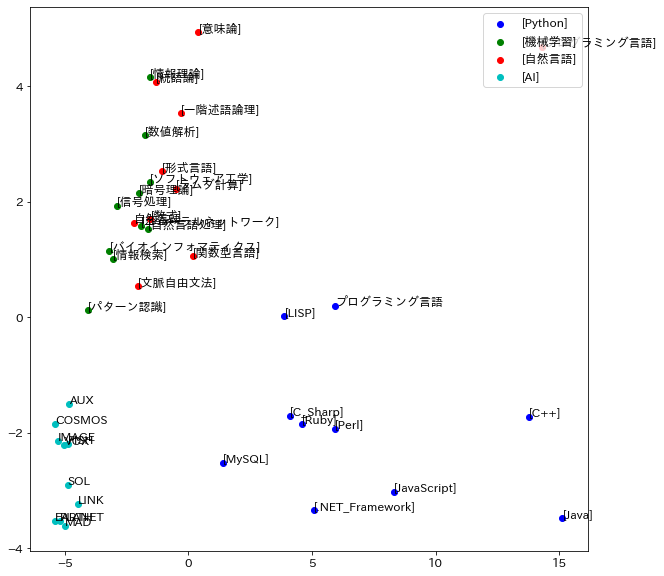

In [41]:
draw_scatter_plot(vectors, tags, cluster)

# **類似語分布**

### **モデル構築**

In [51]:
def draw_word_scatter(word, topn=30):

    # 類似語抽出
    words = [x[0] for x in sorted(model.most_similar(word, topn=topn))]

    vecs = []
    # 各単語のベクトル表現  
    for word in words:
        vec = model.wv[word]
        vecs.append(vec)
        
    # PCAで次元圧縮
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)
    
    # matplotlibによる可視化
    plt.rcParams["font.size"] = 12
    fig, ax = plt.subplots(figsize=(10, 10))
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]

    for i, txt in enumerate(words):
        ax.annotate(txt, (coords[i][0], coords[i][1]))

    ax.scatter(x, y)
    plt.show()

### **類似語を可視化したい単語設定**

In [52]:
word = [u'[機械学習]']

### **類似語の可視化‗PCA**

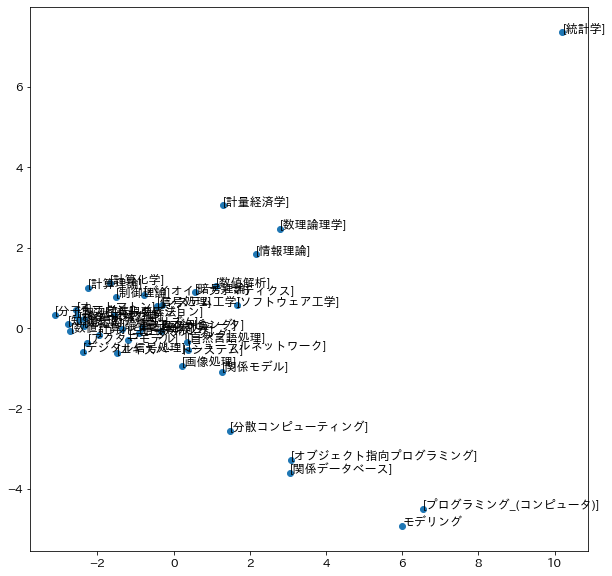

In [53]:
draw_word_scatter(word,40)

# **備考**
- [学習済みの日本語単語ベクトルをColabolatoryで試してみる](https://www.suzu6.net/posts/281-fasttext-in-colabolatory/)
- [学習済みWord2Vec モデルをサクッと使ってみる](http://cedro3.com/ai/word2vec-gensim/)
- [fastTextでサクッと単語の分散表現を使ってみよう！](https://qiita.com/MonaCat/items/c26fa660a711f010c39a)
- [【word2vec】会社のクチコミを自然言語処理した結果を可視化してみる](https://qiita.com/naotaka1128/items/e617f63907fed035408a)